In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import wcs, coordinates, table
from astropy import units as u
from astropy.io import fits

from ekfplot import plot as ek
from ekfplot import colors as ec
from agrias import photometry, utils
from carpenter import emission, conventions, pixels

from pieridae.starbursts import make_figures

In [131]:
catalog, masks = make_figures.load_sample ()

/home/kadofong/.conda/envs/merenv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Computed aperture correction in 0.0 seconds.
Computed line contamination correction in 0.0 seconds.
Loading precomputed Galactic extinction map...
Interpolated Galactic extinction values from map.


/home/kadofong/.conda/envs/merenv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kadofong/merian/carpenter/src/carpenter/emission.py:338: RuntimeWarning: divide by zero encountered in reciprocal
  emission_correction = correct_NIISII(redshift_values, aperture_corrected_logmass)**-1


Computed Galactic extinction correction in 0.9 seconds.
Computed internal extinction corrections in 0.8 seconds.


/home/kadofong/merian/agrias/python/agrias/photometry.py:115: RuntimeWarning: invalid value encountered in log10
  lsq_y = np.log10(np.array([ fdict[band] for band in plawbands ]))
/home/kadofong/.conda/envs/merenv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kadofong/.conda/envs/merenv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [158]:
conversion = cosmo.kpc_comoving_per_arcmin(0.08).to(u.Mpc/u.deg)

In [199]:
catcoords[in_band].match_to_catalog_sky(catcoords[in_band], 2)[1].to(u.arcsec)

<Angle [566.93668657, 379.17680813, 379.17680813, ..., 273.53718096,
         59.75008193,  59.75008193] arcsec>

In [173]:
catcoords = coordinates.SkyCoord(catalog['RA'].values, catalog['DEC'].values, unit='deg')

_, d2d_spec,_ = catcoords[in_band].match_to_catalog_sky(catcoords[in_band], 2)
d2d_spec_phys = (d2d_spec * cosmo.kpc_comoving_per_arcmin(0.08)).to(u.Mpc)

idx, d2d_all,_ = catcoords[is_good].match_to_catalog_sky(catcoords[is_good], 2)
d2d_all_phys = (d2d_all * cosmo.kpc_comoving_per_arcmin(0.08)).to(u.Mpc)


In [195]:
d2d_all_phys[is_starburst[is_good]][d2d_all[is_starburst[is_good]]<(50.*u.arcsec)].to(u.kpc)

<Quantity [11.62154613, 11.62154613, 42.0962517 , 21.81061398, 21.81061398,
           78.66640928,  3.69928976, 28.97294172,  6.40595787, 51.56367617,
            4.32113251,  6.7971679 , 75.47255269,  3.40326433,  3.40326433,
            4.90810375, 20.85910568, 81.47927362, 59.11793542, 27.37194889,
           27.37194889, 36.18643095,  2.58770293, 22.4774576 ,  4.65862362,
           40.5816941 , 10.91168583, 37.3714858 ,  7.8455947 ,  7.8455947 ,
            3.36710466,  6.2635214 ,  5.44420731,  5.44420731, 26.11360137,
            6.56562015,  5.04267939, 58.55622281, 12.43686723,  5.48065324,
            6.72775762, 74.3797324 ,  5.88789644,  8.45522254, 26.88909189,
           18.52875402,  8.46776448,  8.46776448, 35.96155081,  6.24244924,
            3.62927058,  3.62927058, 73.39457754, 48.25668978,  4.12798697,
            5.05779223,  7.7078608 ,  2.96653707,  2.96653707,  6.2467061 ,
           28.72228912, 16.65268951, 17.97512055, 16.65268951,  3.86510218,
           1

In [182]:
catalog.loc[is_good&is_starburst].loc[d2d_all[is_starburst[is_good]]<(50.*u.arcsec)]

,RA,DEC,tract_Merian,patch_Merian,N708_gaap1p0Flux_Merian,N708_gaap1p0FluxErr_Merian,N708_cModelFlux_Merian,N708_cModelFluxErr_Merian,N540_gaap1p0Flux_Merian,N540_gaap1p0FluxErr_Merian,...,haew,oiiiew,rmag,F_Ha_obs,L_Ha,L_OIII,n540_apercorr,i_apercorr,lineratio,pz
M2951014442160116642,35.499225,-6.397218,8283,60,76653.327968,220.979706,226684.434395,526.735729,32889.142050,167.753093,...,67.052262,-29.530634,18.479460,7.150581e-15,1.409587e+41,-8.396030e+40,3.033990,3.026053,-0.595638,0.786133
M2951014442160116643,35.501079,-6.397942,8283,60,66631.983314,205.564807,190773.632886,469.797608,25010.610692,138.504955,...,75.397517,-31.882553,18.702048,6.687840e-15,1.521757e+41,-8.426631e+40,3.146607,2.989723,-0.553744,0.777142
M2951014442160118010,35.468880,-6.384796,8283,60,5482.715981,107.444809,21382.558261,380.073486,4079.928564,88.261315,...,105.858306,44.154882,21.303148,8.048593e-16,1.456045e+40,9.469629e+39,3.839222,3.194576,0.650366,0.880935
M2951317907369376290,37.593555,-6.510703,8284,48,7658.781486,115.853512,18889.332364,262.019518,7854.692648,103.432312,...,167.692937,146.239864,21.284544,1.242193e-15,2.104174e+40,3.159295e+40,2.257585,2.545583,1.501442,1.096876
M2951317907369376291,37.596658,-6.508630,8284,48,7596.354611,111.020881,24375.892914,317.265179,6278.049710,98.433062,...,132.173655,79.009233,21.130191,1.118649e-15,1.982710e+40,1.898465e+40,3.010487,2.695448,0.957510,0.922944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M3667566169981743605,147.224054,4.605515,10295,13,35347.930087,119.574686,41498.870530,114.442927,44156.810290,118.296390,...,264.370559,313.924112,20.928165,2.917316e-15,5.006025e+40,1.036584e+41,1.147413,1.006188,2.070672,1.599817
M3667926809795648744,148.545064,4.564324,10296,14,12208.303569,82.645775,12170.866148,58.779688,10152.457232,71.903460,...,134.769332,149.137907,21.748107,6.462984e-16,1.451145e+40,2.262201e+40,1.009594,0.954771,1.558908,1.570387
M3667966392214233854,148.591744,4.752055,10296,23,59604.634003,193.631982,176176.925452,441.625526,33900.584048,144.501748,...,68.219268,8.246236,18.752677,5.783874e-15,1.155917e+41,1.864145e+40,3.022573,3.013843,0.161270,0.963704
M3667975188307277153,148.130145,4.842982,10296,25,13795.463323,135.481877,29096.125072,264.284084,9974.658945,115.729413,...,58.759842,-1.574670,20.366622,9.205110e-16,1.680841e+40,-7.811117e+38,2.119637,2.390117,-0.046471,0.929409


In [192]:
catalog.loc[is_good].iloc[idx[is_starburst[is_good]][d2d_all[is_starburst[is_good]]<(50.*u.arcsec)]]

,RA,DEC,tract_Merian,patch_Merian,N708_gaap1p0Flux_Merian,N708_gaap1p0FluxErr_Merian,N708_cModelFlux_Merian,N708_cModelFluxErr_Merian,N540_gaap1p0Flux_Merian,N540_gaap1p0FluxErr_Merian,...,haew,oiiiew,rmag,F_Ha_obs,L_Ha,L_OIII,n540_apercorr,i_apercorr,lineratio,pz
M2951014442160116643,35.501079,-6.397942,8283,60,66631.983314,205.564807,190773.632886,469.797608,25010.610692,138.504955,...,75.397517,-31.882553,18.702048,6.687840e-15,1.521757e+41,-8.426631e+40,3.146607,2.989723,-0.553744,0.777142
M2951014442160116642,35.499225,-6.397218,8283,60,76653.327968,220.979706,226684.434395,526.735729,32889.142050,167.753093,...,67.052262,-29.530634,18.479460,7.150581e-15,1.409587e+41,-8.396030e+40,3.033990,3.026053,-0.595638,0.786133
M2951014442160118787,35.462702,-6.388501,8283,60,5502.082155,107.105065,14585.088025,269.521381,4734.786146,89.020711,...,91.899033,64.593103,21.829733,5.039574e-16,8.964379e+39,9.958541e+39,2.857069,2.172879,1.110901,0.928464
M2951317907369376291,37.596658,-6.508630,8284,48,7596.354611,111.020881,24375.892914,317.265179,6278.049710,98.433062,...,132.173655,79.009233,21.130191,1.118649e-15,1.982710e+40,1.898465e+40,3.010487,2.695448,0.957510,0.922944
M2951317907369376290,37.593555,-6.510703,8284,48,7658.781486,115.853512,18889.332364,262.019518,7854.692648,103.432312,...,167.692937,146.239864,21.284544,1.242193e-15,2.104174e+40,3.159295e+40,2.257585,2.545583,1.501442,1.096876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M3667566169981744152,147.219940,4.610333,10295,13,3904.758085,65.412816,10140.143923,160.553689,2924.075690,54.216875,...,32.301406,17.529491,21.401914,2.314341e-16,4.727426e+39,3.737450e+39,2.663059,3.310176,0.790589,0.289517
M3667926809795649292,148.541924,4.574757,10296,14,7705.353878,57.203700,13694.021504,104.146925,5510.506831,47.844762,...,11.857699,1.121939,21.218268,9.525987e-17,2.085708e+39,2.867302e+38,1.772565,1.779763,0.137474,0.329142
M3667966392214233853,148.591012,4.751784,10296,23,78308.194838,178.989865,280067.233247,558.557407,44476.843372,154.317039,...,30.035622,-1.651082,18.143291,4.450300e-15,9.797090e+40,-7.128331e+39,3.618625,3.619935,-0.072760,0.974840
M3667975188307277177,148.133041,4.842217,10296,25,4407.182914,107.733442,15052.992126,358.842064,1930.926267,96.132225,...,163.786134,182.378669,21.975653,9.352887e-16,2.321735e+40,1.947086e+40,3.698276,3.379247,0.838634,0.303129


In [164]:
(bins[1]*u.Mpc/conversion).to(u.arcsec) * (0.168 * u.arcsec/u.pix)**-1

<Quantity 251.73797518 pix>

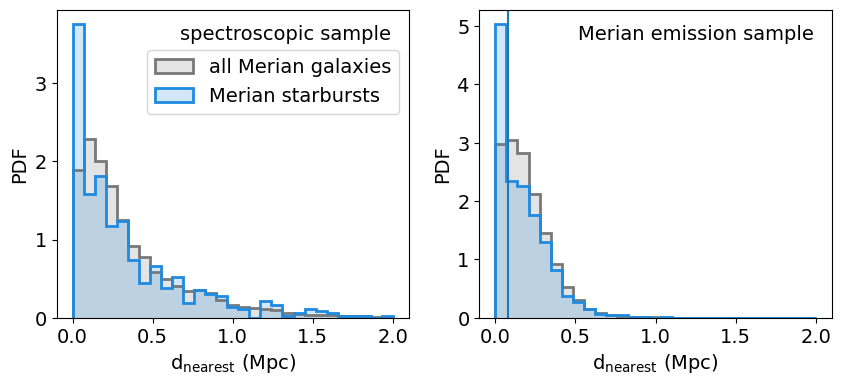

In [169]:
make_figures.mk_pairdistance(catalog, masks)


In [ ]:
from astropy import units as u
from astropy import cosmology
cosmo = cosmology.FlatLambdaCDM(70.,0.3)

from astropy import coordinates

In [72]:
catcoords = coordinates.SkyCoord(catalog['RA'].values, catalog['DEC'].values, unit='deg')

In [133]:
idx, d2d,_ = catcoords.match_to_catalog_sky(catcoords[in_band], 2)
d2d_phys = (d2d * cosmo.kpc_comoving_per_arcmin(0.08)).to(u.Mpc)

(<Axes: >,
 (array([3.75519849, 1.58979206, 1.80907372, 1.17863894, 1.23345936,
         0.74007561, 0.43856333, 0.65784499, 0.38374291, 0.52079395,
         0.19187146, 0.3563327 , 0.30151229, 0.27410208, 0.13705104,
         0.10964083, 0.        , 0.21928166, 0.16446125, 0.02741021,
         0.05482042, 0.10964083, 0.08223062, 0.05482042, 0.02741021,
         0.02741021, 0.02741021, 0.        , 0.02741021]),
  array([0.        , 0.06896552, 0.13793103, 0.20689655, 0.27586207,
         0.34482759, 0.4137931 , 0.48275862, 0.55172414, 0.62068966,
         0.68965517, 0.75862069, 0.82758621, 0.89655172, 0.96551724,
         1.03448276, 1.10344828, 1.17241379, 1.24137931, 1.31034483,
         1.37931034, 1.44827586, 1.51724138, 1.5862069 , 1.65517241,
         1.72413793, 1.79310345, 1.86206897, 1.93103448, 2.        ]),
  [<matplotlib.patches.Polygon at 0x15428776fa60>]))

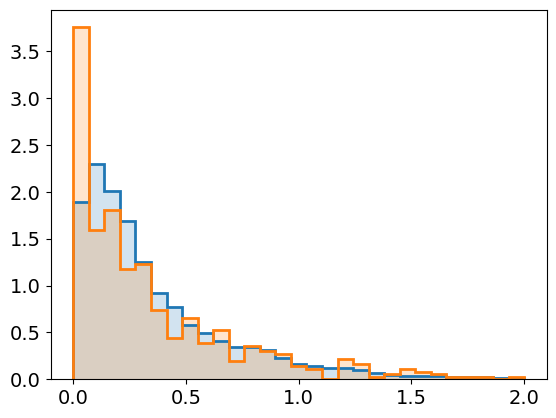

In [134]:
#conversion = cosmo.kpc_comoving_per_arcmin(catalog.loc[in_band, 'z_spec'].mean()).to(u.Mpc/u.deg)
conversion = cosmo.kpc_comoving_per_arcmin(0.08).to(u.Mpc/u.deg)
bins = np.linspace(0., 2.,30)
ek.hist(d2d_phys[in_band].value, density=True, lw=2, alpha=0.2, bins=bins)
ek.hist(d2d_phys[is_starburst&in_band].value, density=True, lw=2, alpha=0.2, bins=bins)
#plt.xscale('log')

array([1, 2])